In [1]:
# 부동산 집값 예측 모델 작성
import pandas as pd

df = pd.read_csv('./data/house_train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
# 데이터 전처리
# 1. 결측치 처리  -> isnull()
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [3]:
# df.dropna()를 활용하여 Nan이 아닌 데이터가 800개 미만인 컬럼을 삭제
df_1 = df.dropna(thresh=4, axis=1)
len(df_1.columns)

81

In [4]:
df_1.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [5]:
df_1 = pd.get_dummies(df_1)  # 모두 숫자로 변환 됨
df_1['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [6]:
# 결측치를 채움 -> 평균으로 채움
df_1 = df_1.fillna(df_1.mean())
df_1.isnull().sum().sort_values(ascending=False).head(20)

Id                    0
Exterior1st_Stucco    0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
BsmtExposure_No       0
BsmtExposure_Mn       0
BsmtExposure_Gd       0
BsmtExposure_Av       0
BsmtCond_TA           0
BsmtCond_Po           0
BsmtCond_Gd           0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
BsmtQual_Fa           0
BsmtQual_Ex           0
BsmtFinType1_LwQ      0
BsmtFinType1_Rec      0
BsmtFinType1_Unf      0
dtype: int64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


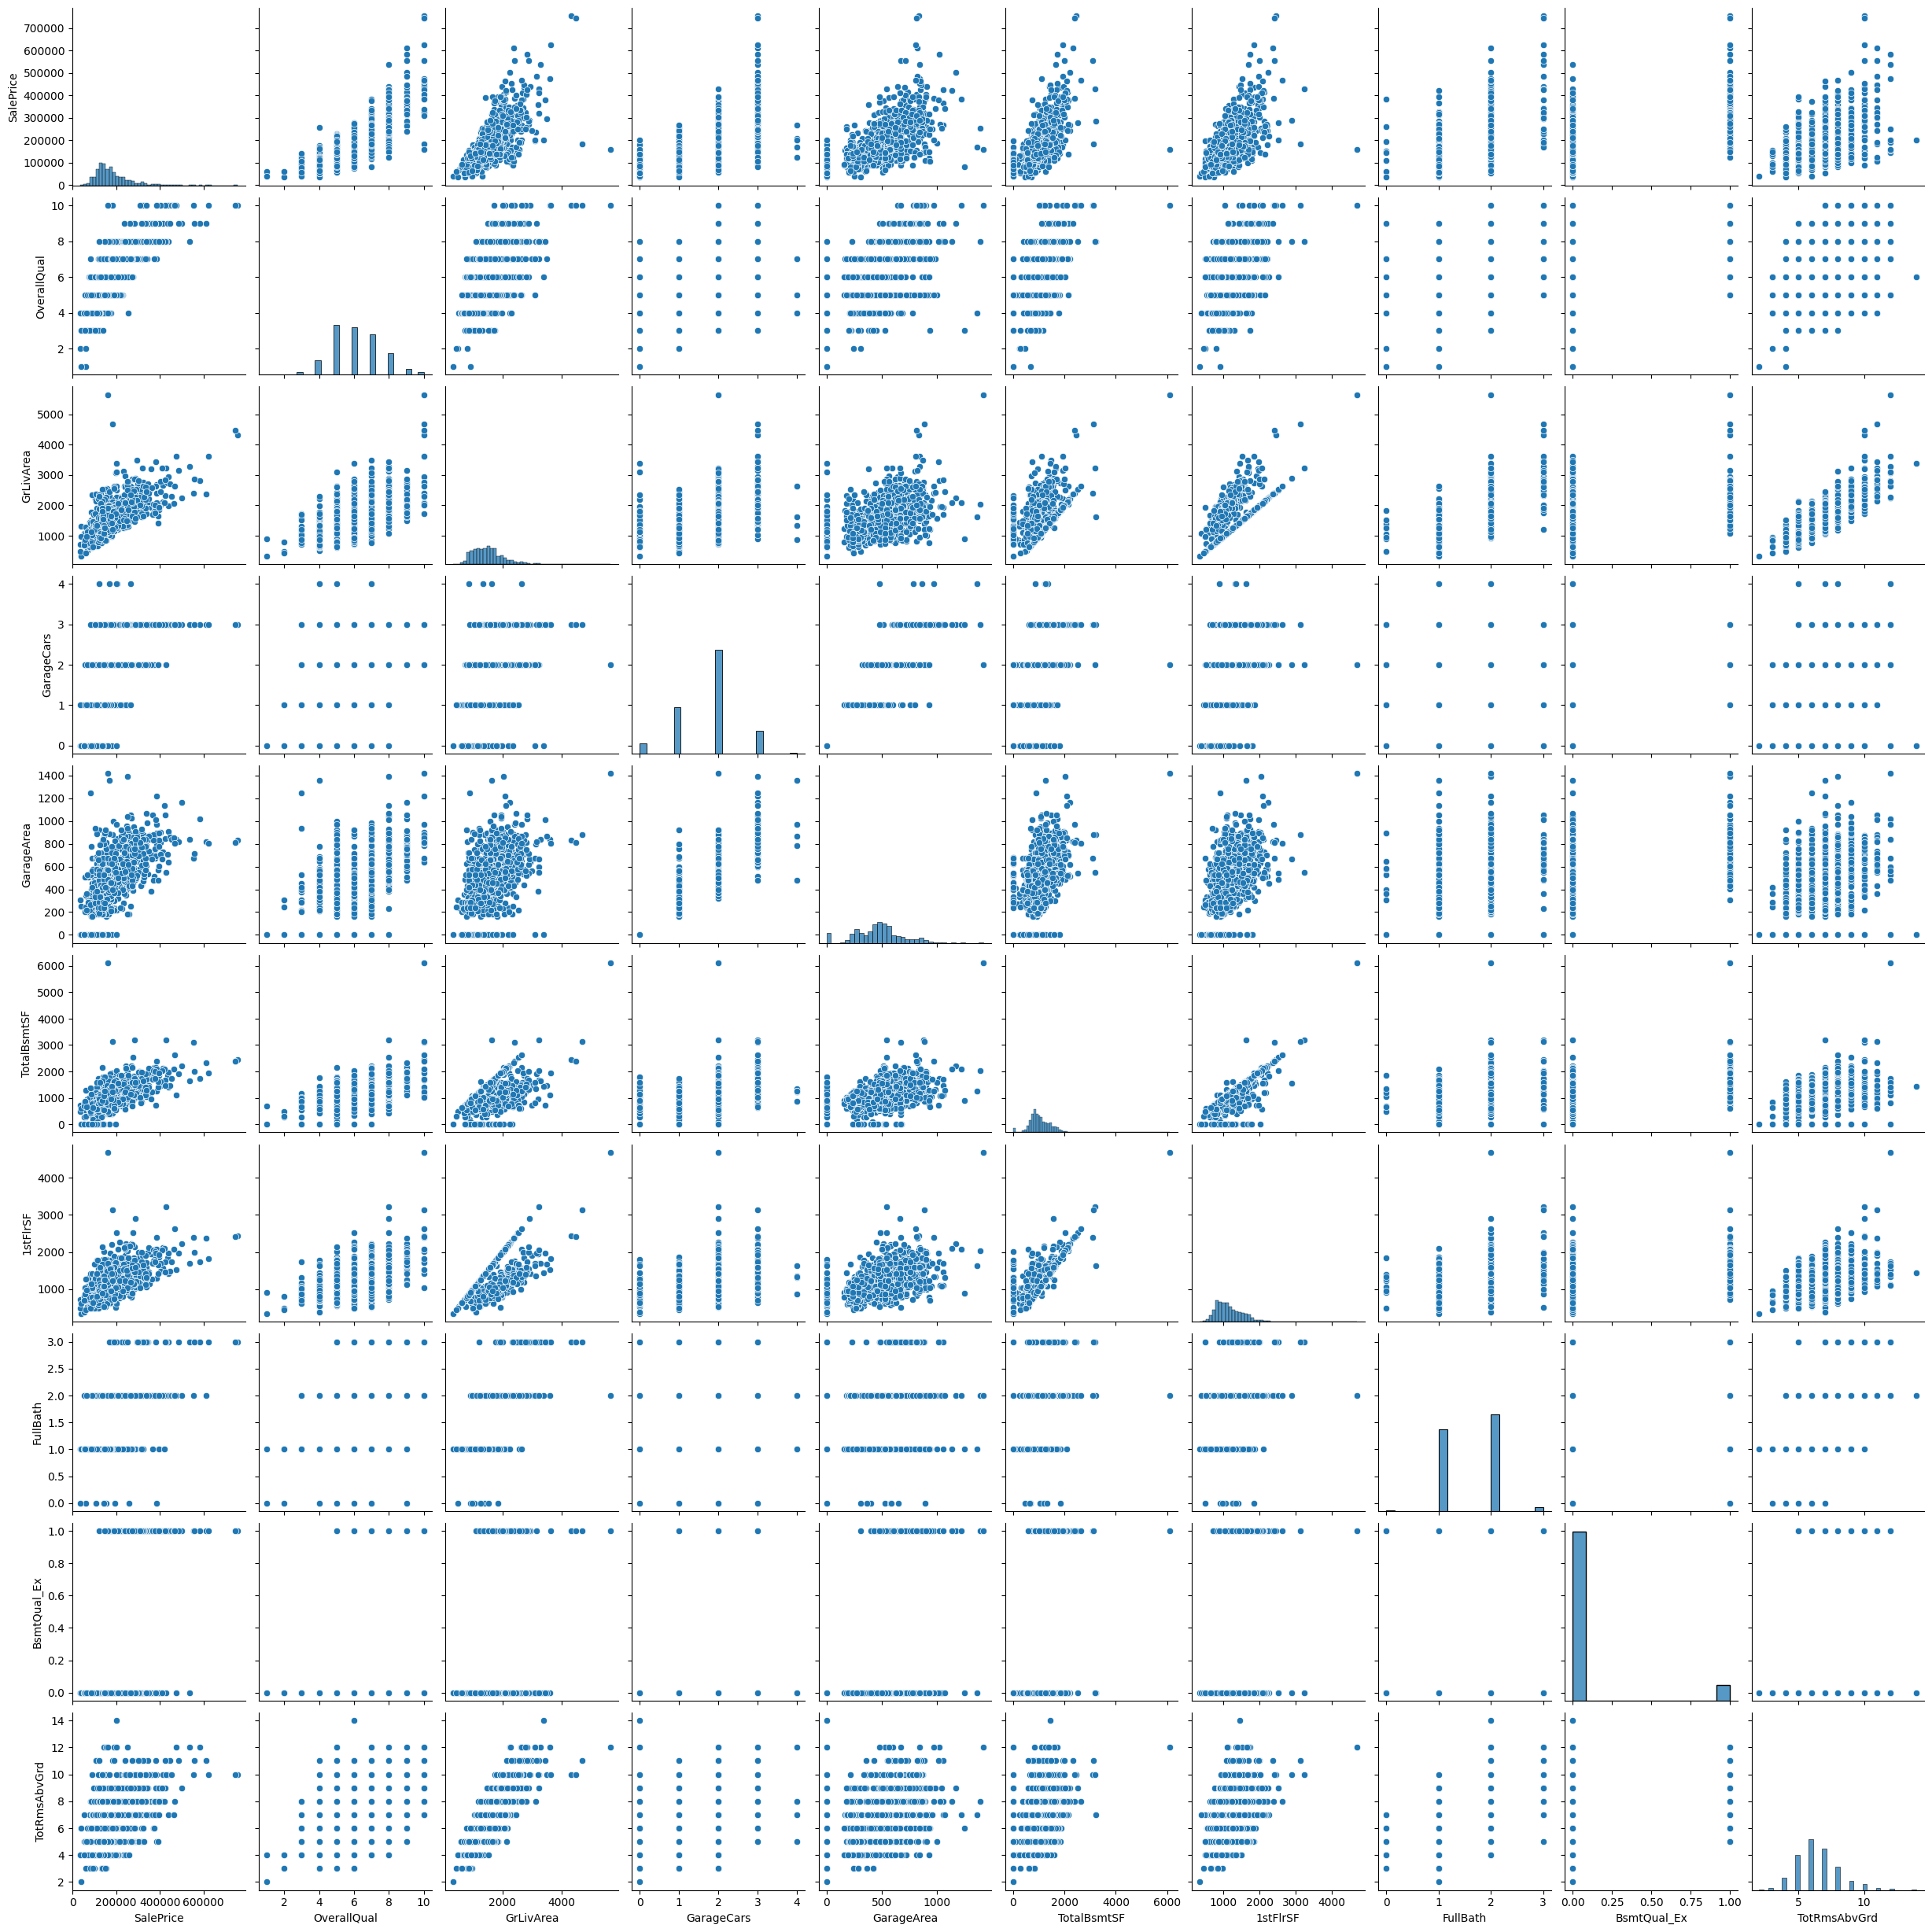

In [7]:
# 1. Nan의 갯수를 확인하고, Nan 일정갯수 이상이면 컬럼 삭제
# 2. 카테고리 변수를 원-핫 인코딩으로 0,1로 변환시킴
# 3. Nan 데이터 처리 -> 평균으로 처리
# 3-1. 데이터 속성과 target(SalePrice)관의 관련도 확인
df_corr = df_1.corr()
# df_corr.info()
# SalePrice와 상관관계가 높은 컬럼을 확인 
corr_columns = df_corr.sort_values('SalePrice', ascending=False)['SalePrice'].head(10).index

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_1[corr_columns])
plt.show()


In [8]:
# 4. 데이터 전처리 완료 -> X 와 y로 분리

train_columns = corr_columns[1:]  # SalePrice 와 상관관계가 상위 10개의 컬럼만 추출
X = df_1[train_columns]  # SalePrice 에 영향을 끼티는 컬럼의 정보만 추출
y = df_1['SalePrice'].values   # SalePrice 자료 추출

X = X.values.astype(np.float32)


NameError: name 'np' is not defined

In [ ]:
# 주택 가격 예측 모델 생성
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np


In [ ]:

# 학습 8 : 테스트 1 로 훈련 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True)

# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                300       
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,871
Trainable params: 1,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

# 중단점, 수행시 모델 저장하는 옵션 지정하고 모델 실행
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

model_path = './data/model/house.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, validation_split=0.25, epochs=5000,
                 batch_size=32, callbacks=[early_stopping, checkpointer])

Epoch 1/5000
28/28 [==============================] - 1s 10ms/step - loss: 39752957952.0000 - val_loss: 35806175232.0000
Epoch 2/5000
28/28 [==============================] - 0s 4ms/step - loss: 38946877440.0000 - val_loss: 34605907968.0000
Epoch 3/5000
28/28 [==============================] - 0s 4ms/step - loss: 36835180544.0000 - val_loss: 31391334400.0000
Epoch 4/5000
28/28 [==============================] - 0s 4ms/step - loss: 31700795392.0000 - val_loss: 24519282688.0000
Epoch 5/5000
28/28 [==============================] - 0s 4ms/step - loss: 22173646848.0000 - val_loss: 13553166336.0000
Epoch 6/5000
28/28 [==============================] - 0s 4ms/step - loss: 10139360256.0000 - val_loss: 3791746048.0000
Epoch 7/5000
28/28 [==============================] - 0s 5ms/step - loss: 3002185216.0000 - val_loss: 2087025152.0000
Epoch 8/5000
28/28 [==============================] - 0s 3ms/step - loss: 2240745728.0000 - val_loss: 2157751552.0000
Epoch 9/5000
28/28 [========================

10/10 [==============================] - 0s 1ms/step
(292, 1) 
 [[ 88389.58 ]
 [215737.9  ]
 [216291.77 ]
 [290989.9  ]
 [132994.08 ]
 [118356.59 ]
 [164461.33 ]
 [136198.42 ]
 [176711.62 ]
 [144718.3  ]
 [106463.99 ]
 [148447.97 ]
 [118095.33 ]
 [262414.47 ]
 [186159.27 ]
 [144546.73 ]
 [122612.23 ]
 [195402.5  ]
 [202425.92 ]
 [170676.42 ]
 [166417.17 ]
 [206378.3  ]
 [204836.58 ]
 [168351.08 ]
 [148942.45 ]
 [141668.11 ]
 [196093.27 ]
 [137729.36 ]
 [202117.7  ]
 [210759.2  ]
 [212089.95 ]
 [191420.22 ]
 [136943.55 ]
 [ 67988.32 ]
 [156289.83 ]
 [229125.78 ]
 [185974.27 ]
 [233893.38 ]
 [137733.02 ]
 [208885.86 ]
 [156699.98 ]
 [155834.23 ]
 [136659.95 ]
 [218694.67 ]
 [190555.33 ]
 [179526.14 ]
 [202596.83 ]
 [164865.98 ]
 [123820.46 ]
 [298884.84 ]
 [117761.914]
 [177464.   ]
 [236315.03 ]
 [117142.54 ]
 [184066.77 ]
 [290463.16 ]
 [148585.14 ]
 [187964.3  ]
 [287485.34 ]
 [160262.38 ]
 [197672.14 ]
 [135445.77 ]
 [238910.42 ]
 [129346.54 ]
 [161784.11 ]
 [170243.58 ]
 [149220.62 

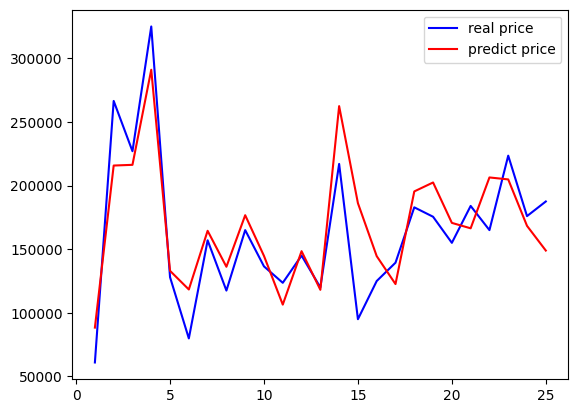

In [ ]:
from tensorflow.keras.models import load_model

house_model = load_model('./data/model/house.hdf5')

# 실제값, 예측값, 실행번호를 가지고 25개의 샘플 얻어 리스트 생성
real_price = []
predict_price = []
X_num = []

y_predict = house_model.predict(X_test)
print(y_predict.shape,'\n',y_predict)  # 2차원으로 결과 반환, -> 1차원으로 reshape
y_predict = y_predict.flatten()  # 다차원을 1차원을 배열 변환
for i in range(25):
    real_price.append(y_test[i])
    predict_price.append( y_predict[i])
    X_num.append(i+1)
 
plt.plot(X_num, real_price, label='real price', c='blue')
plt.plot(X_num, predict_price, label='predict price', c='red')
plt.legend()
plt.show()
    

In [ ]:

train_cols = df_corr.sort_values('SalePrice', ascending=False)['SalePrice'].head(10).index[1:]
train_cols

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [ ]:
print(X.shape, y.shape)

(1460, 9) (1460,)
